# Study cases from Robot dance paper

In [2]:
import os
import pandas as pd
import numpy as np
import datetime

import run_robot
import prepare_data
from importlib import reload
reload(prepare_data)
reload(run_robot)

<module 'run_robot' from '/home/pjssilva/documentos/pesquisa/robot_dance/code/run_robot.py'>

In [3]:

# Define the basic data for the case studies

# Compute initial values for first run and read the cities and other initial data
basic_prm = prepare_data.save_basic_parameters(min_level=0.8)
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 200000, 1)
M = prepare_data.convert_mobility_matrix_and_save(cities_data, max_neighbors=3)

# Create a target matrix (max infected level)
ncities, ndays = len(cities_data.index), int(basic_prm["ndays"])
target = 0.007*np.ones((ncities, ndays))
target[-1, :] = 0.015
target = prepare_data.save_target(cities_data, target)

# Use a forcedif that releases the cities in the end
force_dif = np.ones((ncities, ndays))
force_dif[:-1, 288:] = 0.0
force_dif[-1, 149:] = 0.0

1/42 Americana
2/42 Araraquara
3/42 Araçatuba
4/42 Barueri
5/42 Bauru
6/42 Campinas
7/42 Carapicuíba
8/42 Cotia
9/42 Diadema
10/42 Embu Das Artes
11/42 Franca
12/42 Guarujá
13/42 Guarulhos
14/42 Hortolândia
15/42 Indaiatuba
16/42 Itapevi
17/42 Itaquaquecetuba
18/42 Jacareí
19/42 Jundiaí
20/42 Limeira
21/42 Marília
22/42 Mauá
23/42 Mogi Das Cruzes
24/42 Osasco
25/42 Piracicaba
26/42 Praia Grande
27/42 Presidente Prudente
28/42 Ribeirão Preto
29/42 Rio Claro
30/42 Santo André
31/42 Santos
32/42 Sorocaba
33/42 Sumaré
34/42 Suzano
35/42 São Bernardo Do Campo
36/42 São Carlos
37/42 São José Do Rio Preto
38/42 São José Dos Campos
39/42 São Paulo
40/42 São Vicente
41/42 Taboão Da Serra
42/42 Taubaté
Simulating Americana until 2020-04-23
Simulating Araraquara until 2020-04-23
Simulating Araçatuba until 2020-04-23
Simulating Barueri until 2020-04-23
Simulating Bauru until 2020-04-23
Simulating Campinas until 2020-04-23
Simulating Carapicuíba until 2020-04-23
Simulating Cotia until 2020-04-23
Si

## Case 1: 14 day window, official data

In [ ]:
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

CPU times: user 1h 20min 42s, sys: 34min 48s, total: 1h 55min 31s
Wall time: 18min 57s


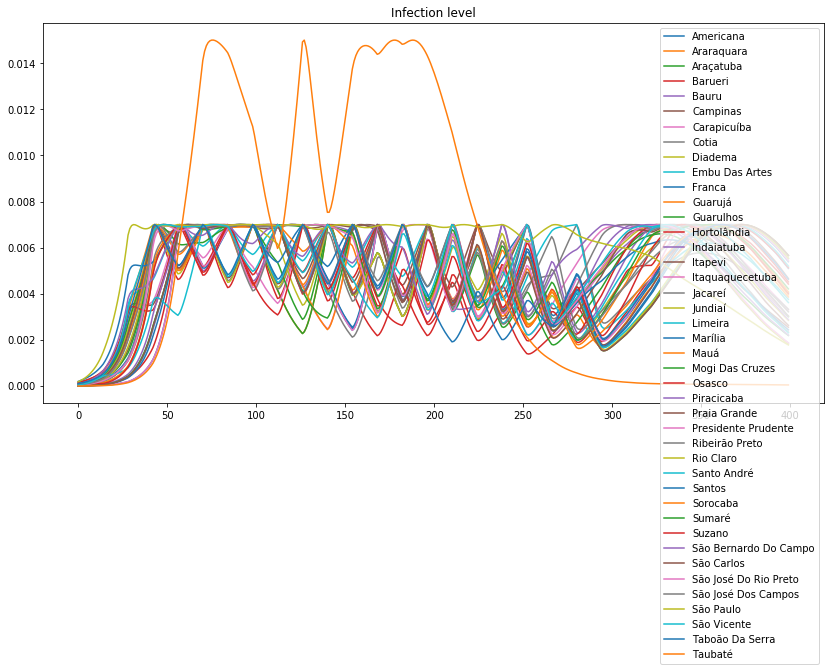

In [5]:
%%time
run_robot.optimize_and_show_results("results/window_14_i.png", "results/window_14_rt.png",
                                    "results/window_14.csv", cities_data.index)

## Case 2: 14 day window, correct sub-notification by 12x

In [ ]:
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 12)
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

In [ ]:
%%time
run_robot.optimize_and_show_results("results/window_14_i_corrected_12x.png", "results/window_14_rt_corrected_12x.png",
                                    "results/window_14_corrected_12x.csv", cities_data.index)

## Case 3: 14 day window, use São Paulo's health structure for the interior in the end, official data

In [ ]:
# Data to simulate the situtation with a correction of 12x
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 1)
# There was a bug in the estimation of the initial conditions for SEIR, there is no need for a hammer phase anymore.
# basic_prm["hammer_duration"] = 14

# Simulate São Paulo giving UTI places to the interior.
start_date = datetime.date(2020, 4, 23)
change_date = datetime.date(2020, 8, 20)
change_index = (change_date - start_date).days
target.iloc[:-1, change_index:] *= 2.0
target.iloc[-1, change_index:] /= 2.0
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

In [ ]:
%%time
run_robot.optimize_and_show_results("results/window_14_extra_capacity_i.png", "results/window_14_extra_capacity_rt.png",
                                    "results/window_14_extra_capacity.csv", cities_data.index)

## Case 4: 14 day window, use São Paulo's health structure for the interior in the end, correct sub-notification by 12x

In [ ]:
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 12)
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

In [ ]:
%%time
run_robot.optimize_and_show_results("results/window_14_i_extra_capacity_corrected_12x.png", "results/window_14_rt_extra_capacity_corrected_12x.png",
                                    "results/window_14_extra_capacity_corrected_12x.csv", cities_data.index)

## Case 5: no control, official data

In [ ]:
basic_prm = prepare_data.save_basic_parameters(rep=1.5, min_level=1.5)
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 1)
target = np.ones((ncities, ndays))
target = prepare_data.save_target(cities_data, target)
run_robot.prepare_optimization(basic_prm, cities_data, M, target, force_dif)

In [ ]:
%%time
run_robot.optimize_and_show_results("results/window_14_i_no_control.png", "results/window_14_rt_no_control.png",
                                    "results/window_14_no_control.csv", cities_data.index)